#### TELECOM CUSTOMER CHURN : DATA 428 PROJECT by JSS109
# 1. EXPLORATORY  ANALYSIS

### GENERAL NOTES ABOUT THE DATA AND JUPYTER NOTEBOOKS USED IN THE PROJECT

    - The ‘Telecom Customer’ dataset contains data for 100,000 customers with 99 variables collected 
    over five years (max months of customer is 61). 
    - It has been downloaded from ‘https://www.kaggle.com/abhinav89/telecom-customer’. 
    - Original file name is "Telecom Customer.csv" - contains difficult to decipher column names.
    - Column nmaes changed in this notebook and a new file "telecom_data_better_colnames.csv" created. This file is used in all other notebooks. ONLY COLUMN NAMES WERE CHANGED - NOTHOING ELSE !
    - The description available on Kaggle about the dataset was also sparse - leading to some assumptions / gaps in understanding of the features.
    - There are a total of five Jupyter Notebooks for ease of keeping the different approaches seperate and allow room for explorations within each approach
    - Notebook No 1   : Exploratory Analysis
    - Notebook No 2   : Descriptive Analysis and DATA MANIPULATION (Flow for Imputation & Dummy Variables)
    - Notebook No 3   : Approach - 1 for Model Building (using Log & Yeo-Johnson Transformation)
    - Notebook No 3(B): To create and save Yeo-Johnson transformed data. Kept separate as done on another machine and bring in the data. (PowerTransformer is only available in versions 0.20.0 of Sci-Kit Learn)
    - Notebook No 4   : Approach - 2 for Model Building using the 'Pipeline' method, based on log transformed data. The notebook has an option of choosing Yeo-Johnson data, but for ready reference, Notebbok 4(B) was made.
    - Notebook No 4(B): Approach - 2 with Yeo_Johnson transformed data.(Notebook is same as No. 4.
    - Notebook No 5   : testing the effects of reduced features based on CONTINUITY FACTOR. A separate flow to test the effects using best Random Forest and ADA Boost models.
    
    - Jotinder S Sudan, 15 March 2019, University of Canterbury, Christchurch
    
### This Notebook :  No.1 
    - Renaming the Columns
    - Visualising the Missing Values
    - Correlation - matrix and plot (matrix for values above 0.7)
    - Class balance - with respect to 'churn' (the 'y' variable)
    - plots of different features with respect to 'churn'


In [1]:
#!pip install seaborn

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import scipy as sp

In [3]:
data = pd.read_csv("Telecom_Customer_Small.csv")

## Exploratory Analysis

In [4]:
print (data.shape)

(9999, 100)


In [5]:
data.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,0.0,N,U,U,U,U,U,Y,NaN,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,0.0,I,U,U,U,U,U,Y,434.0,1000005


### Checking the columns i.e., the variables in the dataset

In [6]:
data.columns

Index(['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou',
       'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean',
       'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean',
       'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean',
       'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean',
       'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean',
       'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean',
       'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean',
       'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean',
       'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean',
       'complete_Mean', 'callfwdv_Mean', 'callwait_Mean', 'churn', 'months',
       'uniqsubs', 'actvsubs', 'new_cell', 'crclscod', 'asl_flag', 'totcalls',
       'totmou', 'totrev', 'adjrev'

### Those column names do not make much sense, hence, making them more readable

In [7]:
telecom_data = data

In [8]:
better_colnames = ["avg_mthly_rev", "avg_no_of_mthly_mins", "avg_total_mthly_recurring_charge", "avg_no_of_directory_assisted_calls",
                   "avg_overage_mins", "avg_overage_rev", "avg_rev_of_voice_overage", "avg_rev_of_data_overage", "avg_no_of_roaming_calls",
                   "percntg_change_in_mthly_mins_vs_previous_three_month_avg", "percntg_change_in_mthly_rev_vs_previous_three_month_avg", 
                   "avg_no_of_dropped_voice_calls", "avg_no_of_dropped_data_calls", "avg_no_of_blocked_voice_calls", "avg_no_of_blocked_data_calls",
                   "avg_no_of_unans_voice_calls", "avg_no_of_unans_data_calls", "avg_no_of_attempted_voice_calls_placed", 
                   "avg_no_of_attempted_data_calls_placed", "avg_no_of_received_voice_calls", "avg_no_of_recieved_sms", 
                   "avg_no_of_completed_voice_calls", "avg_no_of_completed_data_calls", "avg_no_of_cust_care_calls", 
                   "avg_rounded_mins_of_cust_care_calls", "avg_unrounded_mins_of_cust_care_calls", "avg_no_of_inbound_calls_less_than_one_min",
                   "avg_no_of_three_way_calls", "avg_unrounded_mins_of_completed_voice_calls", "avg_unrounded_mins_of_completed_data_calls", 
                   "avg_unrounded_mins_of_received_voice_calls", "avg_no_of_outbound_wireless_to_wireless_voice_calls", 
                   "avg_unrounded_mins_of_outbound_wireless_to_wireless_voice_calls", "avg_no_of_inbound_wireless_to_wireless_voice_calls", 
                   "avg_unrounded_mins_of_inbound_wireless_to_wireless_voice_calls", "avg_no_of_inbound_and_outbound_peak_voice_calls", 
                   "avg_no_of_peak_data_calls", "avg_unrounded_mins_of_peak_voice_calls", "avg_unrounded_mins_of_peak_data_calls", 
                   "avg_no_of_off_to_peak_voice_calls", "avg_no_of_off_to_peak_data_calls", "avg_unrounded_mins_of_off_to_peak_voice_calls", 
                   "avg_unrounded_mins_of_off_to_peak_data_calls", "avg_no_of_dropped_or_blocked_calls", "avg_no_of_attempted_calls", 
                   "avg_no_of_completed_calls", "avg_no_of_call_forwarding_calls", "avg_no_of_call_waiting_calls", 
                   "churn", "total_no_of_months_in_service", "no_of_unique_subscribers_in_the_house",
                   "no_of_active_subscribers_in_house", "new_cell_phone_user", "credit_class_code", "account_spending_limit",
                   "total_no_of_calls_over_the_life_of_the_cust", "total_mins_over_the_life_of_the_cust", "total_rev", 
                   "billing_adjusted_total_rev_over_the_life_of_the_cust", "billing_adjusted_total_mins_over_the_life_of_the_cust",
                   "billing_adjusted_total_no_of_calls_over_the_life_of_the_cust", "avg_mthly_rev_over_the_life_of_the_cust",
                   "avg_mthly_mins_over_the_life_of_the_cust", "avg_mthly_no_of_calls_over_the_life_of_the_cust", 
                   "avg_mthly_mins_over_the_previous_three_months", "avg_mthly_no_of_calls_over_the_previous_three_months", 
                   "avg_mthly_rev_over_the_previous_three_months", "avg_mthly_mins_over_the_previous_six_months", 
                   "avg_mthly_no_of_calls_over_the_previous_six_months", "avg_mthly_rev_over_the_previous_six_months", "social_group_letter_only", 
                   "geogrpahic_area", "dualband", "handset_refurbished_or_new", "current_handset_price", "no_of_handsets_issued", "no_of_models_issued", 
                   "handset_web_capability", "truck_indicator", "rv_indicator", "home_owner/renter_status", "length_of_residence", "dwelling_unit_type",
                   "marital_status", "no_of_adults_in_house", "infobase_match", "estimated_income", "known_no_of_vehicles", 
                   "premier_house_status_indicator", "dwelling_size", "foreign_travel_dummy_variable", "ethnicity_roll_to_up_code", 
                   "child_0_to_2_yrs_in_house", "child_3_to_5_yrs_in_house", "child_6_to_10_yrs_in_house", "child_11_to_15_yrs_in_house", 
                   "child_16_to_17_yrs_in_house", "credit_card_indicator", "no_of_days_of_current_equipment", "cust_id"]

In [9]:
telecom_data.columns = better_colnames

In [10]:
#telecom_data.columns

In [11]:
telecom_data.describe()

,avg_mthly_rev,avg_no_of_mthly_mins,avg_total_mthly_recurring_charge,avg_no_of_directory_assisted_calls,avg_overage_mins,avg_overage_rev,avg_rev_of_voice_overage,avg_rev_of_data_overage,avg_no_of_roaming_calls,percntg_change_in_mthly_mins_vs_previous_three_month_avg,...,no_of_models_issued,truck_indicator,rv_indicator,length_of_residence,no_of_adults_in_house,estimated_income,known_no_of_vehicles,foreign_travel_dummy_variable,no_of_days_of_current_equipment,cust_id
count,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9925.000000,...,9999.000000,9844.000000,9844.000000,8080.000000,8561.000000,8400.000000,6029.000000,9844.000000,9998.000000,9.999000e+03
mean,59.549110,474.487589,45.815900,0.946699,41.533766,12.062412,11.895581,0.165606,1.252761,-16.535315,...,2.298330,0.283015,0.130536,6.543441,2.621072,6.063333,1.561619,0.078017,587.295559,1.005000e+06
std,47.731586,544.391094,26.942024,2.451285,120.327048,30.706972,29.692882,3.248377,7.695013,227.061476,...,1.353098,0.450487,0.336910,4.730184,1.441652,2.145230,0.633656,0.268212,405.682664,2.886607e+03
min,4.745000,0.000000,-2.215000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2785.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-5.000000,1.000001e+06
25%,31.835625,104.812500,29.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-69.500000,...,1.000000,0.000000,0.000000,2.000000,1.000000,5.000000,1.000000,0.000000,234.000000,1.002500e+06
50%,47.500000,296.750000,39.990000,0.247500,1.000000,0.350000,0.012500,0.000000,0.000000,-5.250000,...,2.000000,0.000000,0.000000,6.000000,2.000000,6.000000,1.000000,0.000000,496.000000,1.005000e+06
75%,73.596875,643.687500,59.990000,0.742500,34.500000,11.318125,11.178750,0.000000,0.195000,47.000000,...,3.000000,1.000000,0.000000,10.000000,3.000000,8.000000,2.000000,0.000000,978.000000,1.007500e+06
max,1193.540000,7242.000000,409.990000,55.192500,4320.750000,1102.400000,807.600000,294.800000,416.257500,3712.250000,...,15.000000,1.000000,1.000000,15.000000,6.000000,9.000000,3.000000,1.000000,1812.000000,1.009999e+06


In [12]:
len(telecom_data)

9999

In [13]:
#telecom_data.to_csv('telecom_data_better_colnames.csv')

### What is my data type ?

In [44]:
## following muted to avoid long output - but important to have a look.

#telecom_data.info()
#print (telecom_data.dtypes)

### How much churn is happening ?

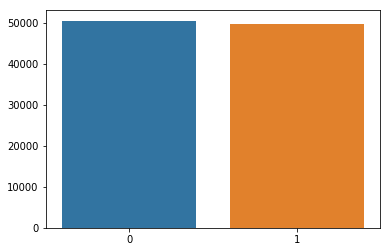

In [16]:
y = telecom_data["churn"].value_counts()
#print (y)
sns.barplot(y.index, y.values)

In [46]:
print(y)

0    50438
1    49562
Name: churn, dtype: int64


In [47]:
# Percentage of Churn

y_True = telecom_data["churn"][telecom_data["churn"] == 1]
print ("Churn Percentage = "+str( (len(y_True) / len(telecom_data["churn"]))*100))

Churn Percentage = 49.562


## Checking for the missing values

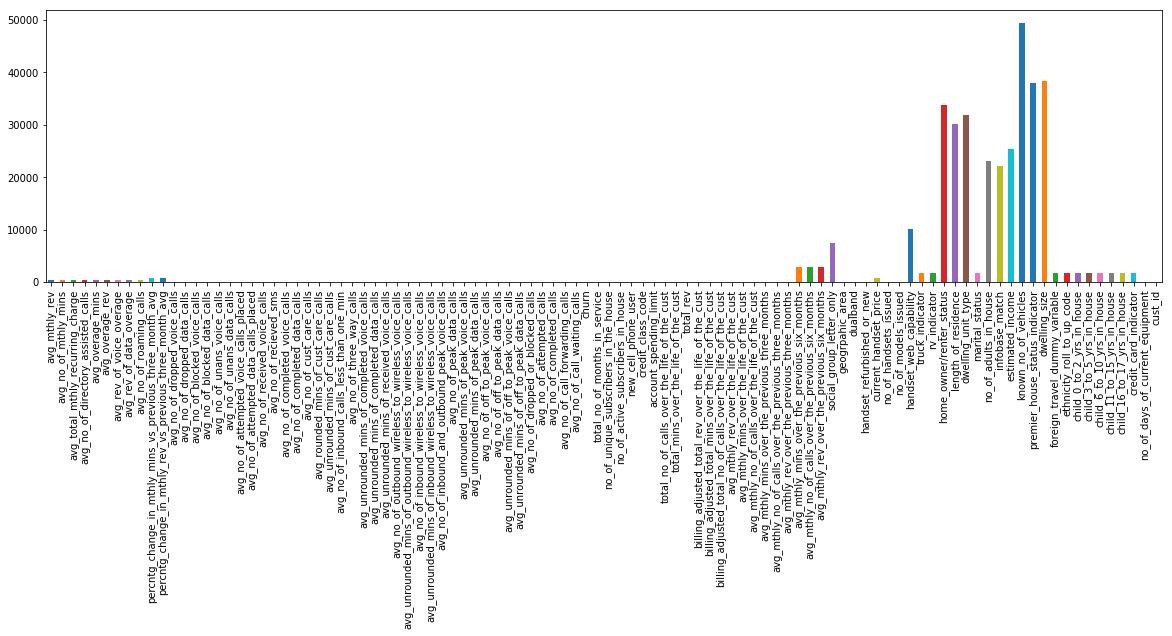

In [17]:
# Null values can be seen as a list, but plot appears to be better.

#telecom_data.isnull().sum()
telecom_data.isnull().sum().plot(kind='bar', figsize = (20, 5))

### Checking the correlation between different features

In [24]:
corr_plot = telecom_data.corr()

In [25]:
## following muted to avoid long output - but important to have a look.

#corr_plot
#corr_plot.info()
#corr_plot.columns  # just to have a look at the columns with quantitaitve values.

    - Creating a mask 

In [26]:
mask = np.zeros_like(corr_plot, dtype=np.bool)

In [27]:
mask[np.triu_indices_from(mask)] = True

In [28]:
mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True]])

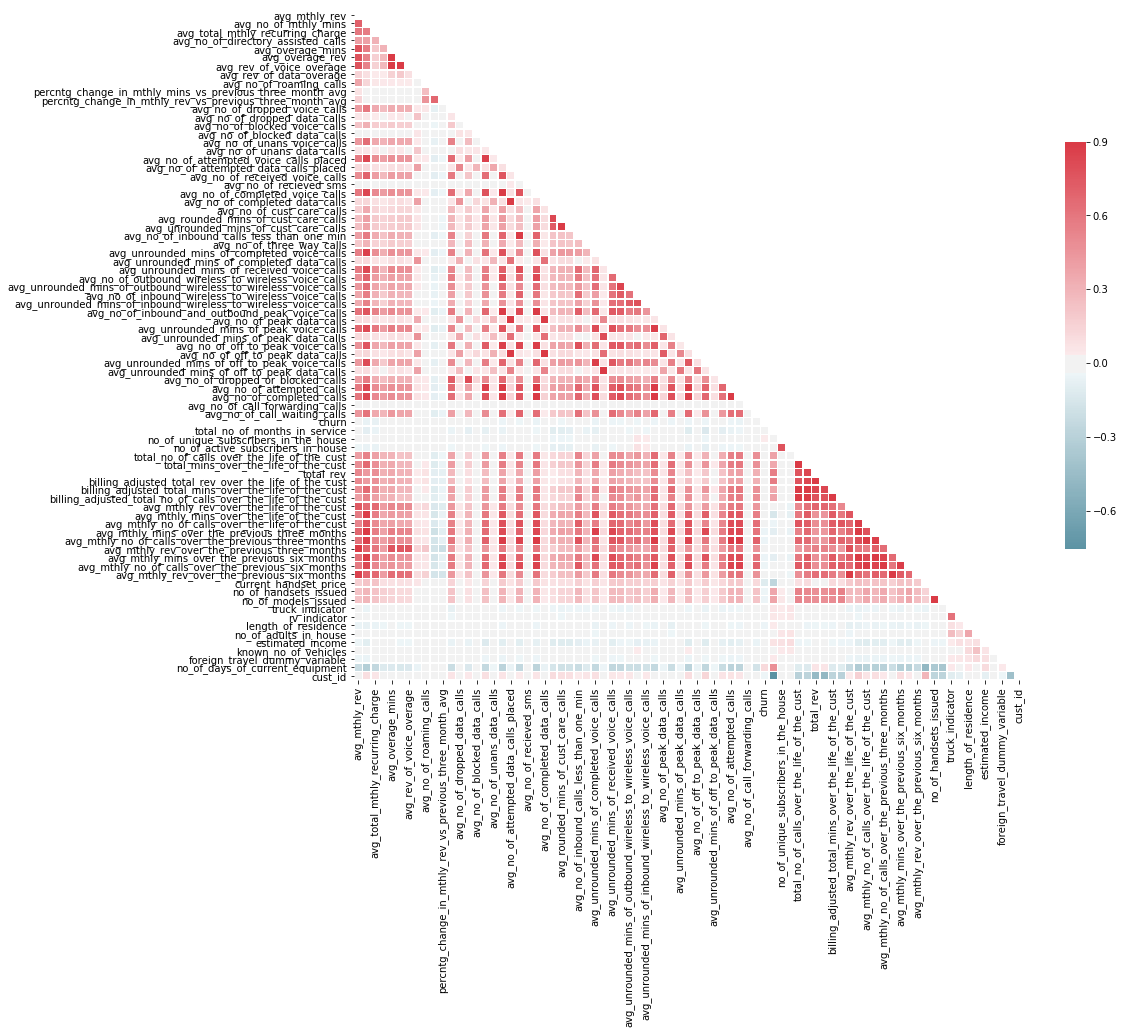

In [29]:
f, ax = plt.subplots(figsize=(15, 15))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_plot, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig('CorrPlot.jpeg')

##### A Correlation plot with values 

In [55]:
corr = telecom_data.corr()
corr.style.background_gradient()

### Filtering highly correlated features > 0.7

In [56]:
strong_corr = corr > 0.7
#strong_corr

In [57]:
strongly_corr_features = corr.mask(~strong_corr)

In [58]:
strongly_corr_features.head()

,avg_mthly_rev,avg_no_of_mthly_mins,avg_total_mthly_recurring_charge,avg_no_of_directory_assisted_calls,avg_overage_mins,avg_overage_rev,avg_rev_of_voice_overage,avg_rev_of_data_overage,avg_no_of_roaming_calls,percntg_change_in_mthly_mins_vs_previous_three_month_avg,...,no_of_models_issued,truck_indicator,rv_indicator,length_of_residence,no_of_adults_in_house,estimated_income,known_no_of_vehicles,foreign_travel_dummy_variable,no_of_days_of_current_equipment,cust_id
avg_mthly_rev,1.000000,0.706029,NaN,NaN,0.772117,0.776647,0.772159,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_no_of_mthly_mins,0.706029,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_total_mthly_recurring_charge,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_no_of_directory_assisted_calls,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_overage_mins,0.772117,NaN,NaN,NaN,1.000000,0.956056,0.953231,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
#strongly_corr_features.style.background_gradient()

#### Exploring correlation between two individual features 
    - Need to remove blanks (Nan) before checking correlation - else corrcoef() gives a 'Nan' output.

In [31]:
avg_overage_rev = telecom_data.avg_overage_rev[~np.isnan(telecom_data.avg_overage_rev)]
len(avg_overage_rev)

99643

In [32]:
avg_overage_mins = telecom_data.avg_overage_mins[~np.isnan(telecom_data.avg_overage_mins)]
len(avg_overage_mins)

99643

In [33]:
sp.corrcoef(avg_overage_rev,avg_overage_mins)

array([[1.       , 0.9560557],
       [0.9560557, 1.       ]])

##### How do various features relate to / effect the churn

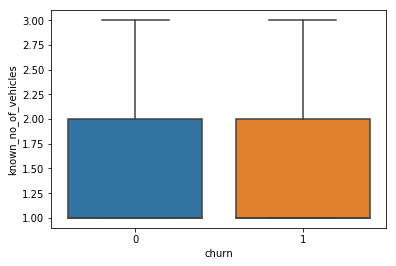

In [34]:
sns.boxplot(telecom_data.churn, telecom_data.known_no_of_vehicles)

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


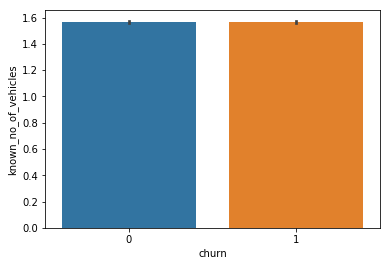

In [64]:
sns.barplot(telecom_data.churn, telecom_data.known_no_of_vehicles)

# WHAT MORE CAN BE DONE HERE ?? HOW TO SELECT FEATURES ?

#### creating a datset of numeric features and checking the missing values

In [65]:
corr_cols = corr.columns
#corr_cols

In [66]:
numeric_data = telecom_data[list(corr_cols)]
numeric_data.shape

(100000, 79)

In [67]:
missing_values = numeric_data.isnull().sum() 

In [68]:
missing_values_df = pd.DataFrame({'features' : corr_cols, 'count_of_missing' : missing_values})
missing_values_df[0:2]

,features,count_of_missing
avg_mthly_rev,avg_mthly_rev,357
avg_no_of_mthly_mins,avg_no_of_mthly_mins,357


In [69]:
# making the df look better !!  
# Muting it as it is counterproductive to run it twice. ;-)

missing_values_df = missing_values_df[missing_values_df.columns[1:]]
# missing_values_df[0:2]

In [121]:
missing_df = missing_values_df.loc[missing_values_df['count_of_missing'] != 0]
missing_df[0:2]

,count_of_missing
avg_mthly_rev,357
avg_no_of_mthly_mins,357


In [71]:
missing_df['percentage_missing'] = missing_df['count_of_missing']/1000
missing_df 

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,count_of_missing,percentage_missing
avg_mthly_rev,357,0.357
avg_no_of_mthly_mins,357,0.357
avg_total_mthly_recurring_charge,357,0.357
avg_no_of_directory_assisted_calls,357,0.357
avg_overage_mins,357,0.357
avg_overage_rev,357,0.357
avg_rev_of_voice_overage,357,0.357
avg_rev_of_data_overage,357,0.357
avg_no_of_roaming_calls,357,0.357
percntg_change_in_mthly_mins_vs_previous_three_month_avg,891,0.891


#### Selecting the categorical features for analysis

In [72]:
len(corr.columns)

79

In [73]:
corr_cols = corr.columns

In [74]:
cat_features_list = sorted(list(set(better_colnames) - set(list(corr_cols))))
len(cat_features_list)

21

In [75]:
cat_features_list += ["churn"] 
cat_features_list

['account_spending_limit',
 'child_0_to_2_yrs_in_house',
 'child_11_to_15_yrs_in_house',
 'child_16_to_17_yrs_in_house',
 'child_3_to_5_yrs_in_house',
 'child_6_to_10_yrs_in_house',
 'credit_card_indicator',
 'credit_class_code',
 'dualband',
 'dwelling_size',
 'dwelling_unit_type',
 'ethnicity_roll_to_up_code',
 'geogrpahic_area',
 'handset_refurbished_or_new',
 'handset_web_capability',
 'home_owner/renter_status',
 'infobase_match',
 'marital_status',
 'new_cell_phone_user',
 'premier_house_status_indicator',
 'social_group_letter_only',
 'churn']

In [76]:
cat_df = telecom_data[cat_features_list]

In [77]:
cat_df

,account_spending_limit,child_0_to_2_yrs_in_house,child_11_to_15_yrs_in_house,child_16_to_17_yrs_in_house,child_3_to_5_yrs_in_house,child_6_to_10_yrs_in_house,credit_card_indicator,credit_class_code,dualband,dwelling_size,...,geogrpahic_area,handset_refurbished_or_new,handset_web_capability,home_owner/renter_status,infobase_match,marital_status,new_cell_phone_user,premier_house_status_indicator,social_group_letter_only,churn
0,N,U,U,U,U,U,Y,A,Y,A,...,NORTHWEST/ROCKY MOUNTAIN AREA,N,WCMB,O,M,S,U,C,S,1
1,N,U,U,U,U,U,Y,EA,N,A,...,CHICAGO AREA,N,WC,NaN,M,S,N,C,U,0
2,N,U,U,U,Y,U,Y,C,N,A,...,GREAT LAKES AREA,N,NaN,O,M,M,Y,C,S,1
3,N,Y,U,U,U,U,Y,B,N,D,...,CHICAGO AREA,N,NaN,NaN,M,M,Y,C,T,0
4,N,U,U,U,U,U,Y,A,Y,O,...,NEW ENGLAND AREA,N,WCMB,R,M,S,Y,C,U,0
5,N,U,U,U,U,U,Y,C,N,NaN,...,GREAT LAKES AREA,N,WCMB,O,M,S,Y,C,U,0
6,N,U,U,U,U,U,Y,A,Y,A,...,DALLAS AREA,N,NaN,O,M,M,N,I,C,1
7,N,U,U,U,U,U,Y,B,Y,A,...,DALLAS AREA,N,WCMB,R,M,M,Y,C,NaN,0
8,N,U,U,U,U,U,N,B,Y,E,...,CHICAGO AREA,N,NaN,NaN,M,M,Y,C,S,0
9,N,U,U,U,U,U,Y,A,Y,A,...,DALLAS AREA,N,WCMB,O,M,M,N,I,C,0


### EXPLORING CATEGORICAL FEATURES IN DETAIL

In [78]:
cat_df.shape

(100000, 22)

In [79]:
missing_cat = cat_df.isnull().sum()
missing_cat

account_spending_limit                0
child_0_to_2_yrs_in_house          1732
child_11_to_15_yrs_in_house        1732
child_16_to_17_yrs_in_house        1732
child_3_to_5_yrs_in_house          1732
child_6_to_10_yrs_in_house         1732
credit_card_indicator              1732
credit_class_code                     0
dualband                              1
dwelling_size                     38308
dwelling_unit_type                31909
ethnicity_roll_to_up_code          1732
geogrpahic_area                      40
handset_refurbished_or_new            1
handset_web_capability            10189
home_owner/renter_status          33706
infobase_match                    22079
marital_status                     1732
new_cell_phone_user                   0
premier_house_status_indicator    37923
social_group_letter_only           7388
churn                                 0
dtype: int64

In [80]:
missing_cat_df = pd.DataFrame({'count_of_missing' : missing_cat})

In [81]:
missing_cat_df = pd.DataFrame(missing_cat_df).reset_index()
missing_cat_df.columns = ['cat_features', 'count_of_missing']

In [82]:
missing_cat_df['percentage_missing'] = missing_cat_df['count_of_missing']/1000
missing_cat_df

,cat_features,count_of_missing,percentage_missing
0,account_spending_limit,0,0.000
1,child_0_to_2_yrs_in_house,1732,1.732
2,child_11_to_15_yrs_in_house,1732,1.732
3,child_16_to_17_yrs_in_house,1732,1.732
4,child_3_to_5_yrs_in_house,1732,1.732
5,child_6_to_10_yrs_in_house,1732,1.732
6,credit_card_indicator,1732,1.732
7,credit_class_code,0,0.000
8,dualband,1,0.001
9,dwelling_size,38308,38.308


In [83]:
missing_cat_df[missing_cat_df.percentage_missing > 10] 

,cat_features,count_of_missing,percentage_missing
9,dwelling_size,38308,38.308
10,dwelling_unit_type,31909,31.909
14,handset_web_capability,10189,10.189
15,home_owner/renter_status,33706,33.706
16,infobase_match,22079,22.079
19,premier_house_status_indicator,37923,37.923


In [84]:

cat_df.groupby(["account_spending_limit", "churn"]).agg({"churn" : "count"}).unstack()

churn       
churn                       0      1
account_spending_limit              
N                       42206  43858
Y                        8232   5704

In [85]:
cat_df.groupby(["child_0_to_2_yrs_in_house", "churn"]).agg({"churn" : "count"}).unstack()

churn       
churn                          0      1
child_0_to_2_yrs_in_house              
U                          47607  46649
Y                           1928   2084

In [86]:
cat_df.groupby(["child_3_to_5_yrs_in_house", "churn"]).agg({"churn" : "count"}).unstack()

churn       
churn                          0      1
child_3_to_5_yrs_in_house              
U                          47217  46355
Y                           2318   2378

In [87]:
cat_df.groupby(["child_6_to_10_yrs_in_house", "churn"]).agg({"churn" : "count"}).unstack()

churn       
churn                           0      1
child_6_to_10_yrs_in_house              
U                           45437  44758
Y                            4098   3975

In [88]:
cat_df.groupby(["child_16_to_17_yrs_in_house", "churn"]).agg({"churn" : "count"}).unstack()

churn       
churn                            0      1
child_16_to_17_yrs_in_house              
U                            44575  43729
Y                             4960   5004

In [89]:
cat_df.groupby(["credit_card_indicator", "churn"]).agg({"churn" : "count"}).unstack()

churn       
churn                      0      1
credit_card_indicator              
N                      15260  15774
Y                      34275  32959

In [90]:
# Some categories show a difference. But unless I know the basis of allocation of these codes to customers, 
# I cannot afford to base any conclusions on these codes
# muted command below - to avoid long output - unmute to run.

#cat_df.groupby(["credit_class_code", "churn"]).agg({"churn" : "count"}).unstack()

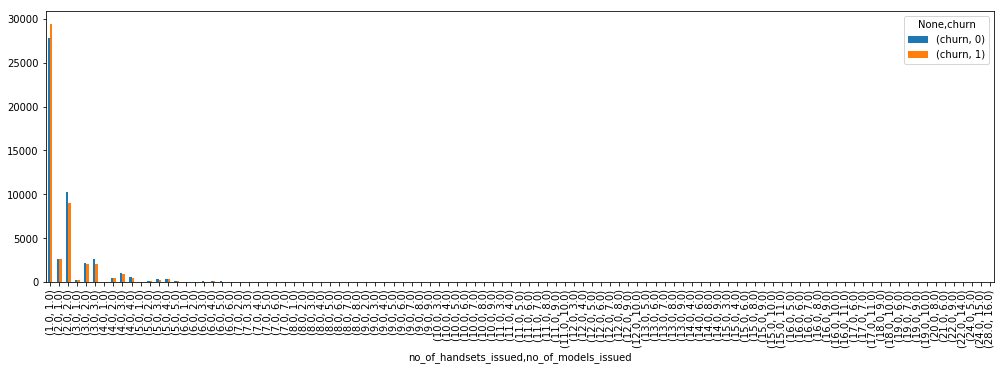

In [120]:
telecom_data.groupby(["no_of_handsets_issued", "no_of_models_issued", "churn"]).agg({"churn" : "count"}).unstack().plot(kind='bar', figsize=(17,5))

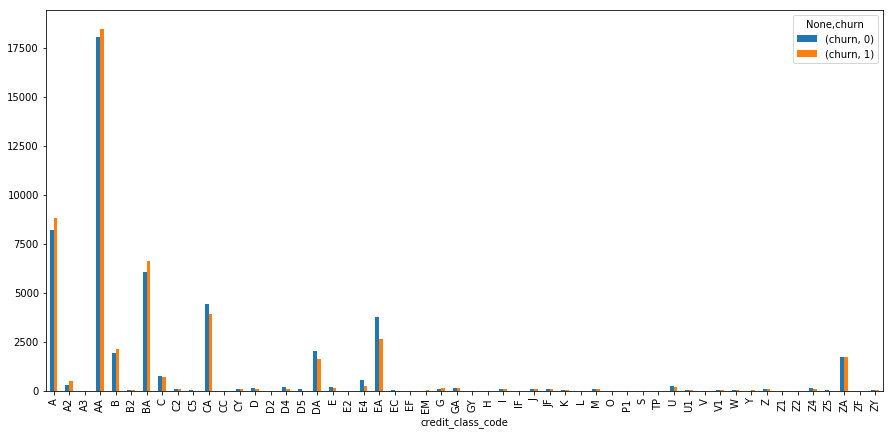

In [92]:
cat_df.groupby(["credit_class_code", "churn"]).agg({"churn" : "count"}).unstack().plot(kind='bar', figsize=(15,7)) 

In [285]:
cat_df.groupby(["dwelling_unit_type", "churn"]).agg({"churn" : "count"}).unstack()

churn       
churn                   0      1
dwelling_unit_type              
M                    9692   9640
S                   25163  23596

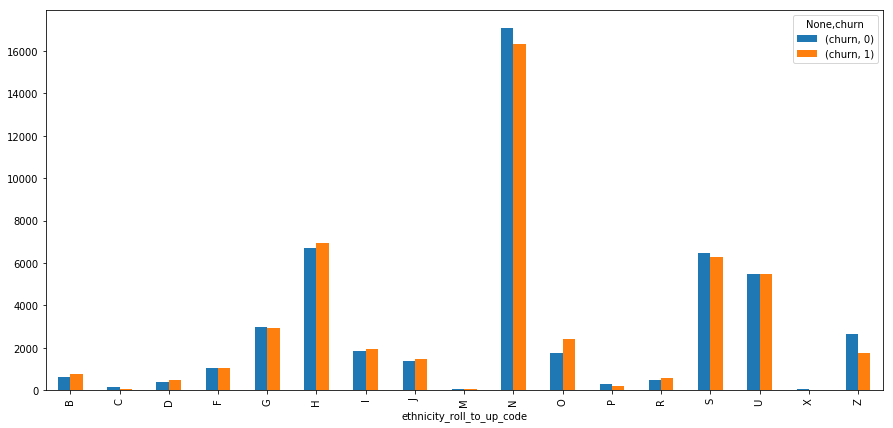

In [286]:
# Is there a suggestion of churn / non churn in category 'O' and 'N' respectively.
cat_df.groupby(["ethnicity_roll_to_up_code", "churn"]).agg({"churn" : "count"}).unstack().plot(kind='bar',figsize=(15,7)) 

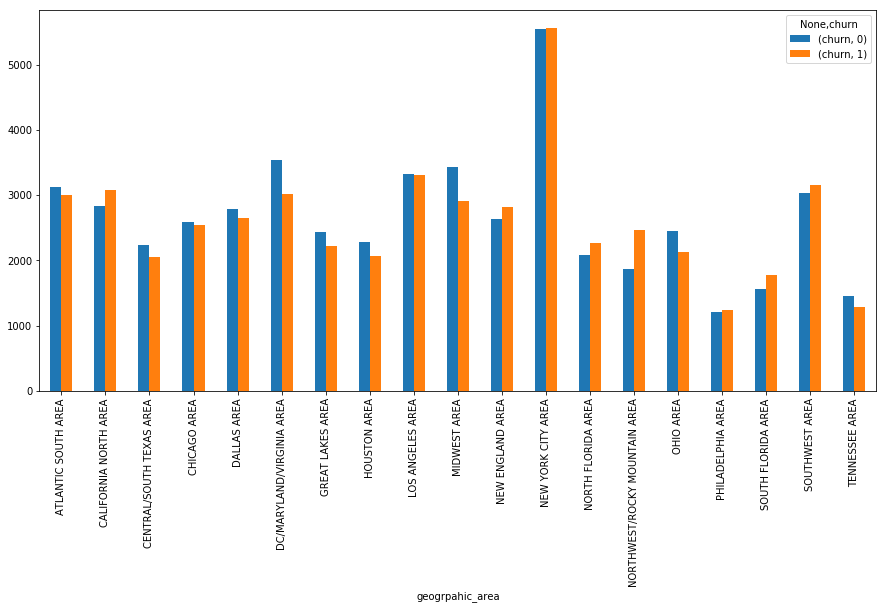

In [287]:
cat_df.groupby(["geogrpahic_area", "churn"]).agg({"churn" : "count"}).unstack().plot(kind='bar',figsize=(15,7))
#cat_df.groupby(["geogrpahic_area", "churn"]).agg({"churn" : "count"}).unstack()

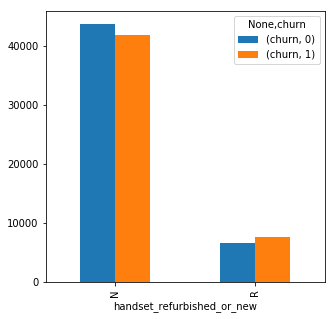

In [288]:
cat_df.groupby(["handset_refurbished_or_new", "churn"]).agg({"churn" : "count"}).unstack().plot(kind='bar', figsize=(5,5)) 

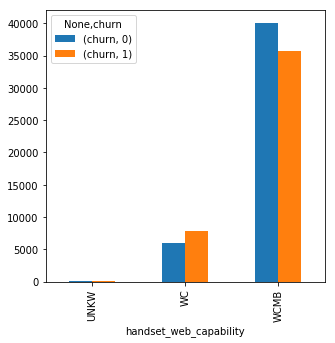

In [289]:
cat_df.groupby(["handset_web_capability", "churn"]).agg({"churn" : "count"}).unstack().plot(kind='bar', figsize=(5,5))

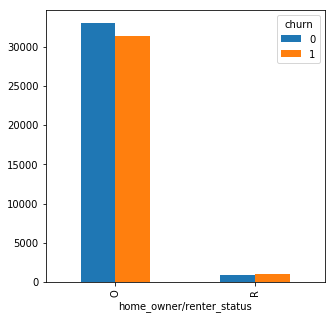

In [290]:
cat_df.groupby(["home_owner/renter_status", "churn"]).size().unstack().plot(kind='bar', figsize=(5,5)) 

In [291]:
cat_df.groupby(["infobase_match", "churn"]).agg({'churn' : 'count'}).unstack()

churn       
churn               0      1
infobase_match              
M               39686  38011
N                 150     74

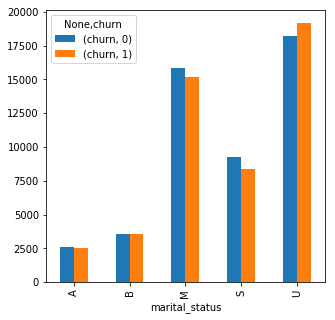

In [292]:
cat_df.groupby(['marital_status', 'churn']).agg({'churn' : 'count'}).unstack().plot(kind='bar', figsize=(5,5)) 

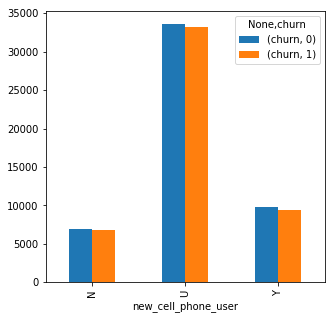

In [293]:
cat_df.groupby(['new_cell_phone_user', 'churn']).agg({'churn' : 'count'}).unstack().plot(kind='bar', figsize=(5,5)) 

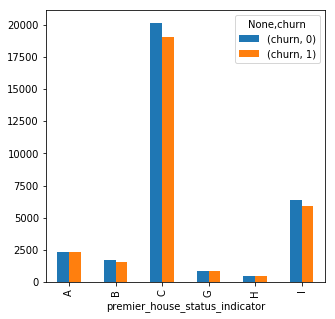

In [294]:
cat_df.groupby(['premier_house_status_indicator', 'churn']).agg({'churn' : 'count'}).unstack().plot(kind='bar', figsize=(5,5)) 

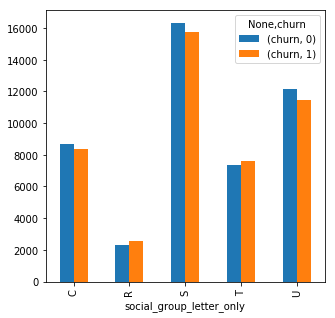

In [295]:
cat_df.groupby(['social_group_letter_only', 'churn']).agg({'churn' : 'count'}).unstack().plot(kind='bar', figsize=(5,5)) 

### DATA EXPLORATION NOTEBOOK ENDS HERE